In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style = 'seaborn')
%matplotlib inline
np.random.seed(42)
import tensorflow as tf
import torch

# PyTorch seed
torch.manual_seed(42)

# TensorFlow seed
tf.random.set_seed(42)

<ipython-input-2-1ff639cb2697>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [ ]:
df_reviews_preprocessed = pd.read_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_preprocessed.csv')


One hot encoding of label

In [ ]:
df_reviews_preprocessed['label'] = np.where(df_reviews_preprocessed['label']=='positive',1,0)
df_reviews_preprocessed.head(10)

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language
0,0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,0,en
1,2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,0,en
2,3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,0,en
3,4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,0,en
4,5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,0,en
5,6,4c445b4b34fc8f4ada2ddcd819a05b58,368449,5c7fbb4bcde0a004abe524c4c03d209d,1,not great reads like th grader really well con...,0,en
6,7,6096427ce218e7965671ef46f8fbaa31,10448215,e60d2669f94ca9977a5777ab96cc694c,1,book appeal fans dan brown plot relies main ch...,0,en
7,8,b7d8a8a36da8cbf54aa0dbad66f37dfe,78129,5b88e73a69479f43eb02c432aacc5e54,1,several people know read loved series thought ...,0,en
8,9,7cbe23bcf53f42276f237316ba79b6d7,12257650,7a0abc268fdaec9cebff7811bb13e4e4,1,read one gave made think comic book maybe year...,0,en
9,10,22496af88f94ec2203ce5656ee2852f0,27868408,0af66bd97cfc1f7231f2cb2f8c6b9256,1,book soo slow end not justify means know got g...,0,en


1    95706
0    49945
Name: label, dtype: int64


<Axes: ylabel='label'>

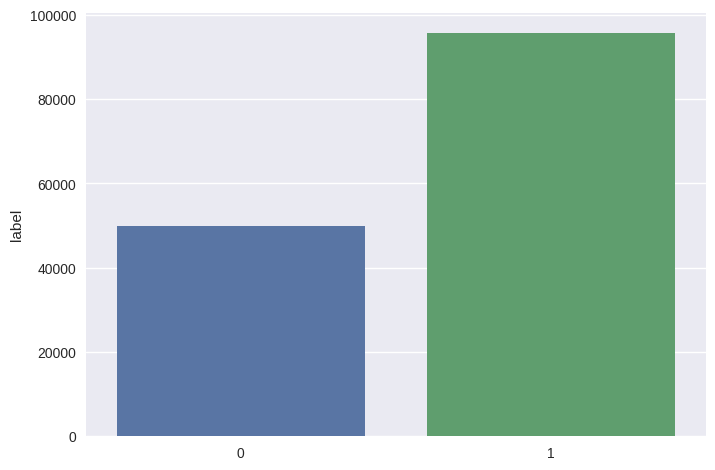

In [ ]:
#balanced dataset? --> positve are double of negative!
import seaborn as sns
x=df_reviews_preprocessed['label'].value_counts()
print(x)

sns.barplot(x=x.index, y=x)

In [ ]:
from sklearn.utils import resample

# Splitting dataset in two according to class label
df_positive = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 1]
df_negative = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 0]

# Undersampling on positive class
df_positive_downsampled = resample(df_positive, replace=False, n_samples=len(df_negative), random_state=42)

# Re building the dataframe
df_reviews_preprocessed = pd.concat([df_negative, df_positive_downsampled])

In [ ]:
# WORD-COUNT on average
df_reviews_preprocessed['word_count'] = df_reviews_preprocessed['review_text'].apply(lambda x: len(str(x).split()))
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count'].mean()) #Positive reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count'].mean()) #Negative reviews

57.464270697767546
51.89870857943738


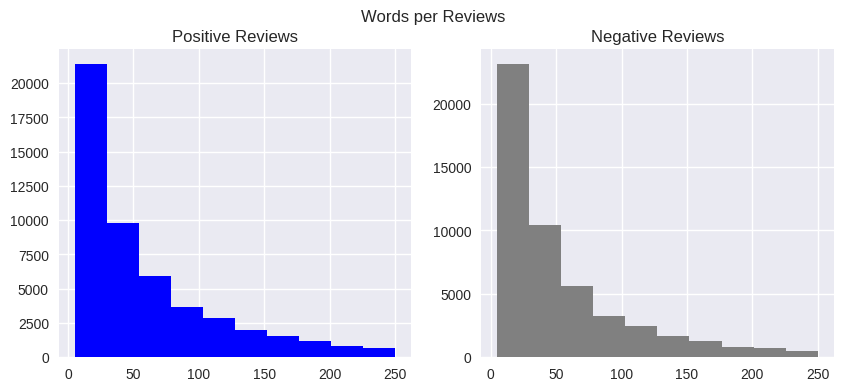

In [ ]:
# PLOTTING WORD-COUNT
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive Reviews')
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count']
ax2.hist(train_words,color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per Reviews')
plt.show()

In [ ]:
df_reviews_preprocessed= df_reviews_preprocessed[df_reviews_preprocessed['word_count']<=250]
df_reviews_preprocessed.shape

(99890, 9)

Shuffling the dataset

In [ ]:
df_reviews_preprocessed = df_reviews_preprocessed.sample(frac=1, random_state=42)
df_reviews_preprocessed.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.reset_index(inplace=True)
df_reviews_preprocessed.head()

,index,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
0,85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
1,80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
2,90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
3,19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
4,144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.drop(columns=['index' , 'Unnamed: 0'],inplace=True) #'Unnamed: 0'
df_reviews_preprocessed.tail()

,user_id,book_id,review_id,rating,review_text,label,language,word_count
99885,6d331c858c1e7688572df30b2dcee0ee,8491980,21bb7b67686f99bb83f6c4c81f258efb,2,rarely read true crime novels reminded althoug...,0,en,54
99886,0a4cee787e44914c038aa6c1a27a0260,22206617,3bbc8c903a38bb3647edd5c493f0d0e8,4,great read another tess monaghan series first ...,1,en,61
99887,c791ede441204ff82b792efb99697922,23482795,fe6abee61381b49bddd6b1c03f3f91dd,5,loved book never read karin slaughter thought ...,1,en,49
99888,4b1948b45023a002fa67e28a378f06bd,17212231,bbedbc85d7ff65bb092156e792b20a78,1,okay classify one worst dan brown far managed ...,0,en,13
99889,83d71654cbd761bb197c33a1c58c3803,17348167,45122f9020dc423fb8975d4740d2ad46,3,fourth novel alexander seaton hero first intro...,0,en,115


Max length per sentence

In [ ]:
max_sentence = max(df_reviews_preprocessed['review_text'], key=len)
words_per_sentence = len(max_sentence.split())
print(f"The max length of a review is {words_per_sentence}")

The max length of a review is 249


# GloVe embedding
Unsupervised learning algo to represent word as dense vector by keeping into account also context. GloVe is a pre trained word vectors model.

Basically uses frequencies of co-occurences rather than related word to context. More information of words. Combinaton of word vector related to probability of co-occurence in that specific corpus.



In [ ]:
# create the function to obtain the corpus
# that is applied to the following chunk

from nltk.tokenize import word_tokenize
import nltk


def create_corpus_tk(df):
    corpus = []
    for text in df['review_text']:
        words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus


In [ ]:
# let's apply the function to our text
import nltk
nltk.download('punkt')

corpus = create_corpus_tk(df_reviews_preprocessed)
#corpus= create_corpus_tk(X_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# how many words have we in our corpus?
num_words= len(corpus)
print(num_words)

In [ ]:
corpus[0]

In [ ]:
#splitting in train e test
# test set is 20% of the entrire set
from sklearn.model_selection import train_test_split
X, y = df_reviews_preprocessed['review_text'], df_reviews_preprocessed['label']
X_train, X_test, y_train, y_test = train_test_split(df_reviews_preprocessed['review_text'],
                                                    df_reviews_preprocessed['label'],
                                                    test_size=0.2, random_state = 45)

In [ ]:
# train sententces
X_train

In [ ]:
# train labels
y_train

In [ ]:
# let's tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 249

In [ ]:
#let's tokenize using actual words of our vocabulary
# and apply it to our train sentences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# sequences created on sentences
# converted all words to corresponding integer in tokenizer
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences

In [ ]:
# to use keras we need pad of fixed length: each sentence will be in this length
# we use the max length of out reviews, nothing will be truncated
train_padded = pad_sequences (
    train_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
# 0 means that the review is shorter than 249 words
train_padded

In [ ]:
# let's replicate it on our test sentences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences (
    test_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
test_padded # same length of 249

In [ ]:
print(X_train[0]) #real review
print(train_sequences[0]) #padded review

In [ ]:
word_index = tokenizer.word_index
print("Number of unique words:",len(word_index))

In [ ]:
# dictionary: keys are words found, value are increment numbers
word_index


In [ ]:
word_index['mystery'] #mystery has index 13

13

## Creating Embedding dictionary using GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip


--2024-01-06 10:31:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-06 10:31:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-06 10:31:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='UTF-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vectors = np.asarray(values[1:], 'float32')
      embedding_dict[word] = vectors

f.close()


In [ ]:
#embedding dictionary that adds each vector in the index GloVe pre trained vector
#each word is mapped to a specific vector of 100 dimensions, because we are using this version of GloVe
# the specific word is written between ''
embedding_dict

In [ ]:
# let's create embedded matrix
num_words = len(word_index) +1 #because for loop
embedding_matrix = np.zeros((num_words, 100)) #embedding matrix--> array of zeros

for word, i in word_index.items():
  if i<num_words:
    emb_vec = embedding_dict.get(word) # assing the vector to the actual word in our corpus
    if emb_vec is not None:
      embedding_matrix[i]=emb_vec


In [ ]:
#array of vector, or better: array of the embedded vectors
# position is the specific position of the word in our word_index
embedding_matrix

In [ ]:
# let's check for mystery word
word_index['mystery'] # 13th word

13

In [ ]:
embedding_dict.get('mystery') #correspondant embedded vector

In [ ]:
# let's verify that embedded matrix in position 13 is the embedded vector of mystery
(embedding_matrix[13] == embedding_dict.get('mystery')).all()

# ok it is verified the correspondance

True

Embedding matrix: array in which a specific position correspond to the word in the word_index


In [ ]:
print(train_padded.shape) #items in train set, vectors of length of 249
print(y_train.shape)

print(test_padded.shape) # items in test set
print(y_test.shape)

## **Baseline Model with GloVe**

**Model 1**

Benchmark:


*   Create a sequential model using Sequential().
*   Add an Embedding layer to the model. This layer is initialized with a pre-trained matrix and configured as non-trainable.


*   Add an LSTM layer to the model with 100 units and a dropout of 10% to prevent overfitting.


*   Create an Adam optimizer with a learning rate of 3e-4.
*   Compile the model specifying the loss function as "binary_crossentropy," the previously created optimizer, and the evaluation metric as accuracy.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(
    Embedding(
        num_words, #our corpus
        100,
        embeddings_initializer=Constant(embedding_matrix), #initialized with our matrix
        input_length = max_len,
        trainable = False, #because already trained
    )
)
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

We start running 25 epochs because we noticed that going beyond results in overfitting

In [ ]:
history = model.fit(
    train_padded,
    y_train,
    epochs=25,
    validation_data=(test_padded, y_test),
    verbose=1
)

In [ ]:
# predict actual data
sequences = tokenizer.texts_to_sequences(X_test)
padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
pred= model.predict(padded)
pred_int =pred.round().astype('int')

625/625 [==============================] - 3s 4ms/step


In [ ]:
pred # actual predictor

array([[0.24842745],
       [0.029356  ],
       [0.9829533 ],
       ...,
       [0.59044474],
       [0.26041767],
       [0.786423  ]], dtype=float32)

In [ ]:
pred_int

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
padded[0]

In [ ]:
model.predict(padded[5].reshape(1,-1))

1/1 [==============================] - 0s 27ms/step


array([[0.3495484]], dtype=float32)

Inverse check: let's check that the review is actual negative



In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
def decode(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode(sequences[0])

'interesting little bit romance little interesting premise based literary th century author famous diary opium eater main protagonist despite addiction interference officials think murderer protagonist manages solve mystery assistance london police detectives daughter'

In [ ]:
y_test

In [ ]:
#let's build the dataset with actual and predicted label
data = {'review_text': list(X_test), 'actual_label': list(y_test), 'predicted_label': list(pred_int)}

# Creating a DataFrame
df_results = pd.DataFrame(data)

In [ ]:
#remove square brakets from predicted column
df_results['predicted_label'] = df_results['predicted_label'].astype(str)
df_results['predicted_label'] = df_results['predicted_label'].str.strip("[]").astype(int)


In [ ]:
df_results.head()

In [ ]:
# calculating the correct predictions of the model
df_results['correct_prediction'] = df_results['actual_label']-df_results['predicted_label']

In [ ]:
df_results.head()

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction'] = df_results['correct_prediction'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})


In [ ]:
df_results.head()

In [ ]:
df_results.groupby('correct_prediction')['predicted_label'].count()

correct_prediction
corretto      15413
incorretto     4565
Name: predicted_label, dtype: int64

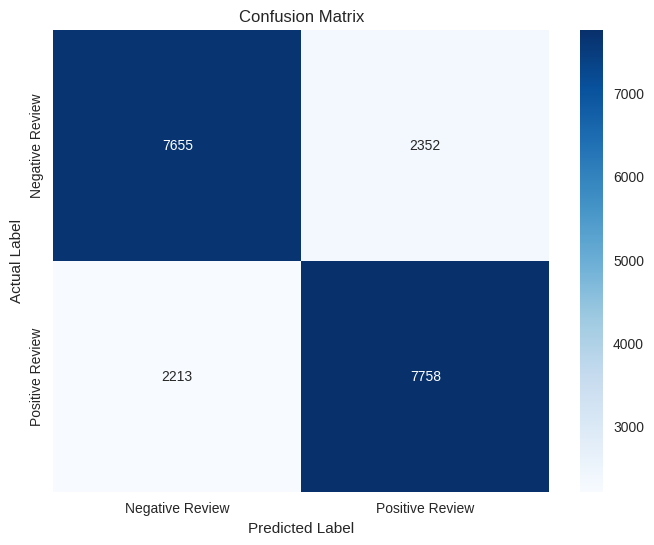

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


Final metrics calculated:

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred_int))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10007
           1       0.77      0.78      0.77      9971

    accuracy                           0.77     19978
   macro avg       0.77      0.77      0.77     19978
weighted avg       0.77      0.77      0.77     19978



Plot of loss and accuracy

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Loss info
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

#Accuracy history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = list(epochs)

#Creating interactive plot
fig = make_subplots(rows=2, cols=1, subplot_titles=['Training and Validation Loss', 'Training and Validation Accuracy'],
                    shared_xaxes=True, vertical_spacing=0.1)

#Loss plot
fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Training loss', line=dict(color='red')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation loss', line=dict(color='blue')),
              row=1, col=1)

#Accuracy plot
fig.add_trace(go.Scatter(x=epochs, y=train_accuracy, mode='lines+markers', name='Training accuracy', line=dict(color='red')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, mode='lines+markers', name='Validation accuracy', line=dict(color='blue')),
              row=2, col=1)

fig.update_layout(title_text='Training and Validation Loss and Accuracy',
                  xaxis=dict(title='Epochs'),
                  yaxis=dict(title='Loss/Accuracy'))

#Info by passing mouse
fig.update_layout(hovermode='x unified',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Courier New"))

fig.show()

**Model 2**


*   Similar to the previous one, just the number of nodes has changed from 100 to 128 in the first 1 layer (in order to increase complexity)



*   Let's set a number of epochs equal to 50, then we will see whether to reduce the number if there is overfitting






Epoch 1/50
2498/2498 [==============================] - 32s 12ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 2/50
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6934 - accuracy: 0.5031 - val_loss: 0.6935 - val_accuracy: 0.4993
Epoch 3/50
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6933 - accuracy: 0.5038 - val_loss: 0.6928 - val_accuracy: 0.4995
Epoch 4/50
2498/2498 [==============================] - 32s 13ms/step - loss: 0.6942 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 5/50
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6940 - accuracy: 0.5014 - val_loss: 0.6935 - val_accuracy: 0.4990
Epoch 6/50
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6940 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4990
Epoch 7/50
2498/2498 [==============================] - 32s 13ms/step - loss: 0.6939 - accuracy: 0.4993 - val_loss: 0.6933 -

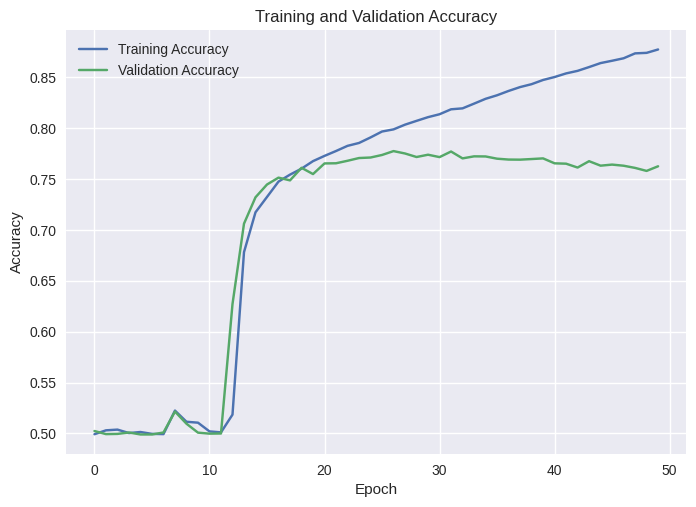

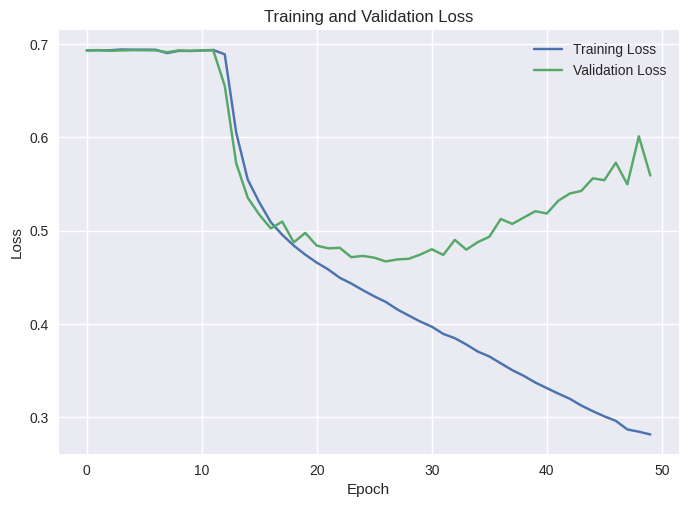

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model1 = Sequential()

model1.add(
    Embedding(
        num_words, #our corpus
        100,
        embeddings_initializer=Constant(embedding_matrix), #initialized with our matrix
        input_length = max_len,
        trainable = False, #because already trained
    )
)
model1.add(LSTM(128, dropout=0.1))
model1.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=3e-4)

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history1 = model1.fit(
    train_padded,
    y_train,
    epochs=50,
    validation_data=(test_padded, y_test),
    verbose=1
)

# Accuracy plot
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

It seems that the model is overfitting, so we decide to block the training at the 25-th epoch

Epoch 1/25
2498/2498 [==============================] - 41s 15ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 2/25
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6938 - val_accuracy: 0.4991
Epoch 3/25
2498/2498 [==============================] - 32s 13ms/step - loss: 0.6920 - accuracy: 0.5120 - val_loss: 0.6935 - val_accuracy: 0.5018
Epoch 4/25
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6921 - accuracy: 0.5058 - val_loss: 0.6941 - val_accuracy: 0.5020
Epoch 5/25
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.4993
Epoch 6/25
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6930 - accuracy: 0.5029 - val_loss: 0.6928 - val_accuracy: 0.4991
Epoch 7/25
2498/2498 [==============================] - 29s 12ms/step - loss: 0.6869 - accuracy: 0.5279 - val_loss: 0.6928 -

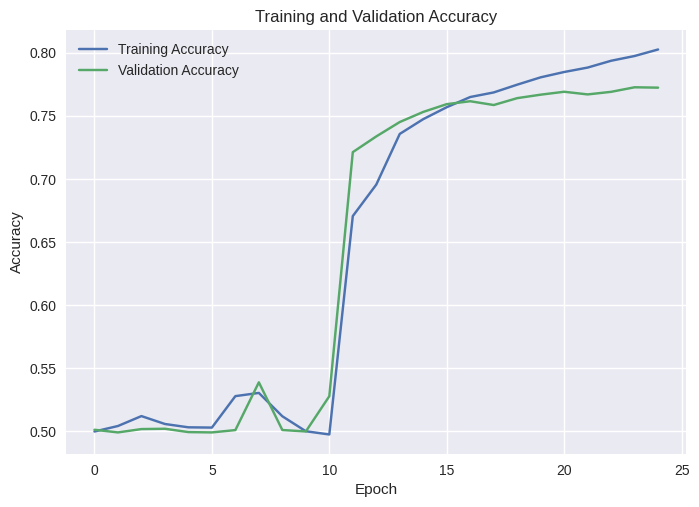

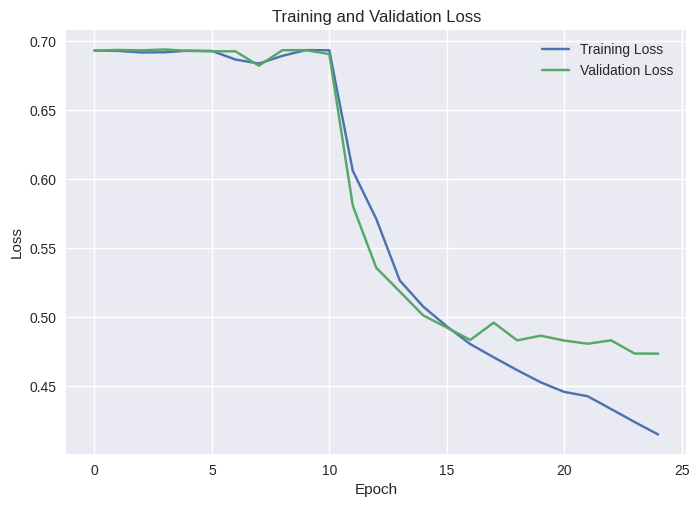

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model1 = Sequential()

model1.add(
    Embedding(
        num_words, #our corpus
        100,
        embeddings_initializer=Constant(embedding_matrix), #initialized with our matrix
        input_length = max_len,
        trainable = False, #because already trained
    )
)
model1.add(LSTM(128, dropout=0.1))
model1.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=3e-4)

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history1 = model1.fit(
    train_padded,
    y_train,
    epochs=25,
    validation_data=(test_padded, y_test),
    verbose=1
)

# Accuracy plot
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# predict actual data
sequences = tokenizer.texts_to_sequences(X_test)
padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
pred= model1.predict(padded)
pred_int_128 =pred.round().astype('int')

625/625 [==============================] - 3s 4ms/step


Add a new column to the df_results dataframe:

In [ ]:
# Add a new column 'predicted_label_128' to the DataFrame
df_results['predicted_label_128'] = pred_int_128

#remove square brakets from predicted column
df_results['predicted_label_128'] = df_results['predicted_label_128'].astype(str)
df_results['predicted_label_128'] = df_results['predicted_label_128'].str.strip("[]").astype(int)

# calculating the correct predictions of the model
df_results['correct_prediction_128'] = df_results['actual_label']-df_results['predicted_label_128']

# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_128'] = df_results['correct_prediction_128'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results.groupby('correct_prediction_128')['predicted_label_128'].count()


correct_prediction_128
corretto      15429
incorretto     4549
Name: predicted_label_128, dtype: int64

Comparison with previous results:

In [ ]:
df_results.groupby('correct_prediction')['predicted_label'].count()

correct_prediction
corretto      15413
incorretto     4565
Name: predicted_label, dtype: int64

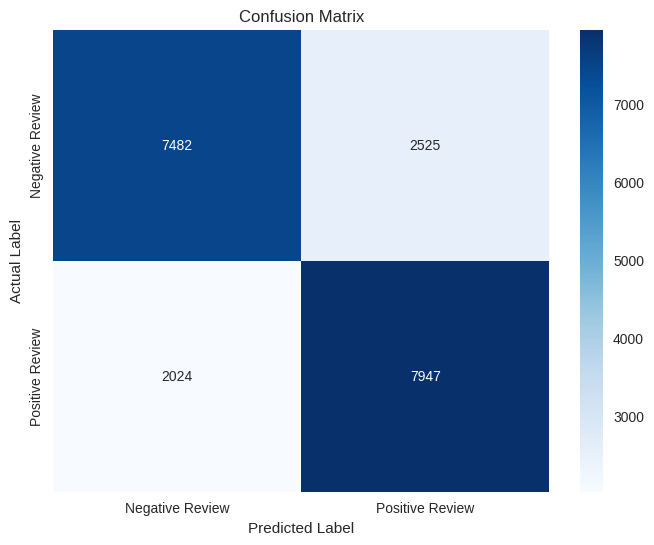

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_128)
#labels
class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Comparison with previous results:

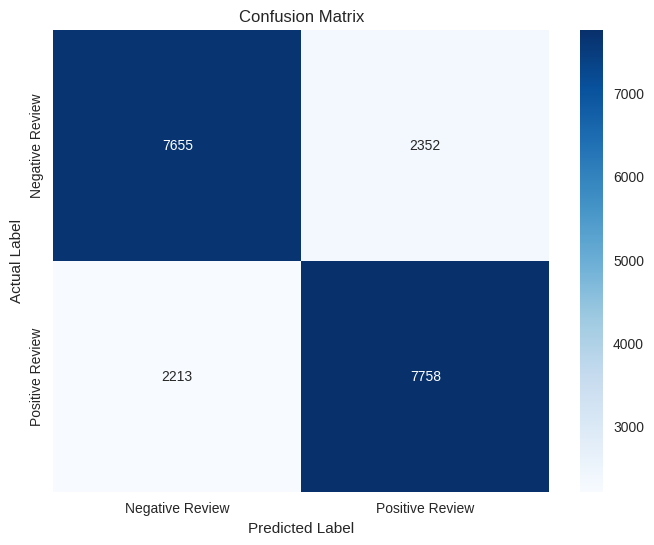

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred_int_128))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     10007
           1       0.76      0.80      0.78      9971

    accuracy                           0.77     19978
   macro avg       0.77      0.77      0.77     19978
weighted avg       0.77      0.77      0.77     19978



Comparison with previous results:

In [ ]:
print(classification_report(y_test, pred_int))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10007
           1       0.77      0.78      0.77      9971

    accuracy                           0.77     19978
   macro avg       0.77      0.77      0.77     19978
weighted avg       0.77      0.77      0.77     19978

